![My Logo](https://thoughtsociety.org/wp-content/uploads/2019/03/ts_notebook_header.png)

# Support Vector Machines

SVM can either act as a classifier or regressor.
This notebook focuses on the classifier.

### How does SVM work

In essence, it creates a line, usually called a 'hyperplane' that separates data into classes as you will see in this demo.

### The problem:

Figure out the species of an Iris based solely on petal and sepal length and width. Apparently, this has good separability since these features clearly distinguish the Iris and lends itself to a straightforward classification algorithm. 

Given the well-known Iris dataset which has over 3700 kernels submitted for it on Kaggle, we are working with a small dataset whose features and target are easy to comprehend.

EDA will show the separability so the results will not shock you.  (they will be 1.0 - perfect accuracy)

The theory behind SVM's is also straightforward and if you need to go through that, I recommend the following reads:

1. [Support Vector Machine Introduction from Pythonprogramming.net](https://pythonprogramming.net/support-vector-machine-intro-machine-learning-tutorial/)
2. [Support Vector Machines for Machine Learning on Machinelearningmastery.com](https://machinelearningmastery.com/support-vector-machines-for-machine-learning/)
3. [SVM Wikipedia Page](https://en.wikipedia.org/wiki/Support-vector_machine)
4. [SVM Intro to Machine Learning Algorithms - Rohith Gandhi - Towards Data Science](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)
5. [Support Vector Machines(SVM) — An Overview](https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989)


## Dataset Description

* Species - The target
* SepalLengthCm 
* SepalWidthCm
* PetalLengthCm 
* PetalWidthCm

Pretty simple, right?

## Here is what we will be doing

1. Get Iris.csv from my github public repo
2. EDA 
 * Pie chart of the species
 * Pairplot
 * Heatmap
 * Scatter of sepal
 * Scatter of petal
 * Boxplots of sepal/species and petal/species
 * Violinplots of sepal/species and petal/species
3. Create X and y from df
4. train_test_split for combined svc using sepal and petal
5. fit with SVC
6. Predict
7. Print metrics.accuracy.score(y_test vs. predictions)
8. Run 3-7 again just on petal_length

As I said before, this dataset presents high-separability which lends itself well to SVM.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import svm

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/thoughtsociety/ads_track4/master/datasets/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


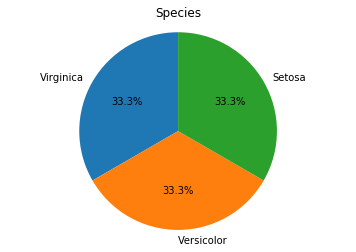

In [4]:
labels = 'Virginica', 'Versicolor', 'Setosa'
sizes = [33, 33, 33]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Species')
plt.show()


In [5]:
df.drop('Id',axis=1,inplace=True)

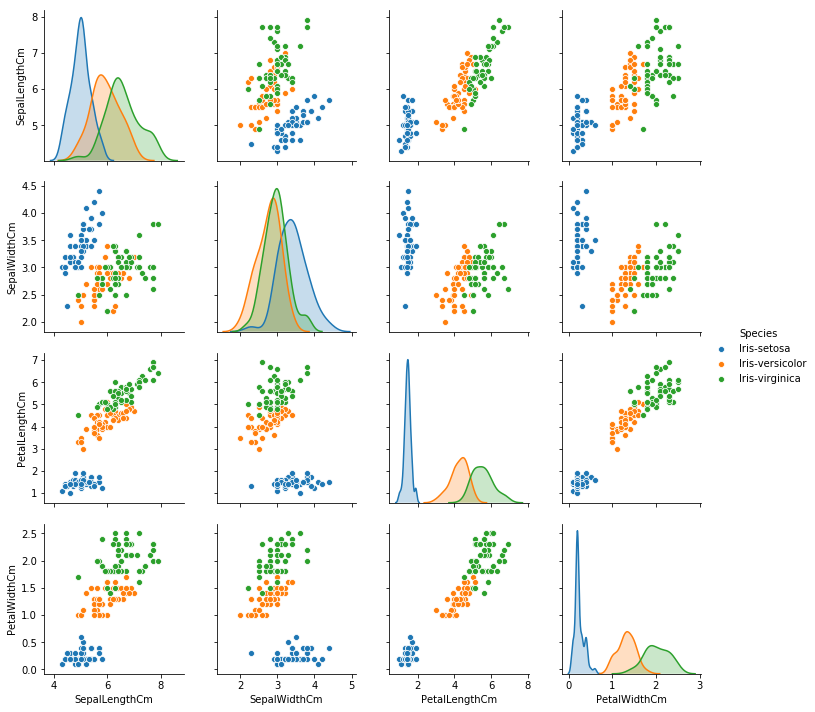

In [6]:
sns.pairplot(hue='Species',data=df)

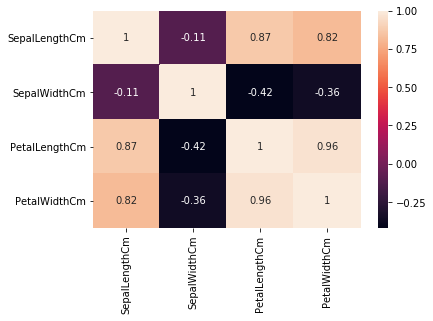

In [7]:
sns.heatmap(df.corr(),annot=True)

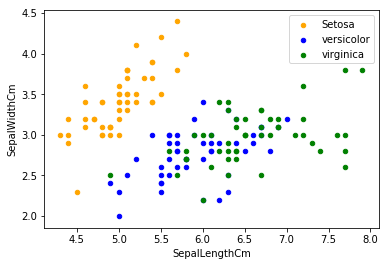

In [8]:
#Sepal Properties
figure=df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue',label='versicolor',ax=figure)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica',ax=figure)

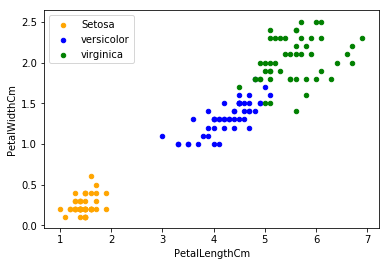

In [9]:
#Petal Properties
figure = df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=figure)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=figure)

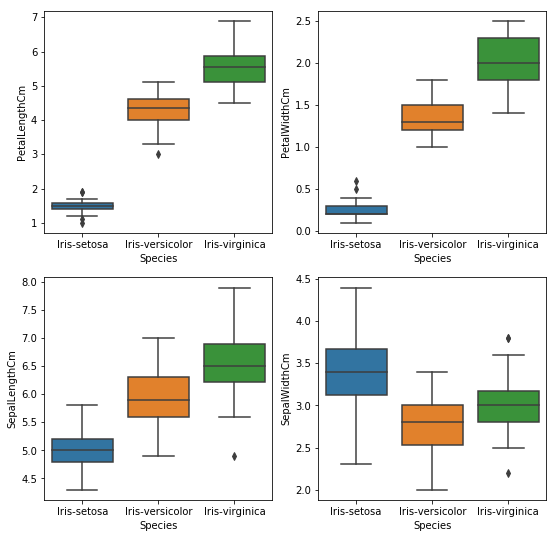

In [10]:
#box plot can help us view the different values for a particular feature with respect to different species
figure_box=plt.figure(figsize=(9,9))
figure_box.add_subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=df)
figure_box.add_subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=df)
figure_box.add_subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=df)
figure_box.add_subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=df)

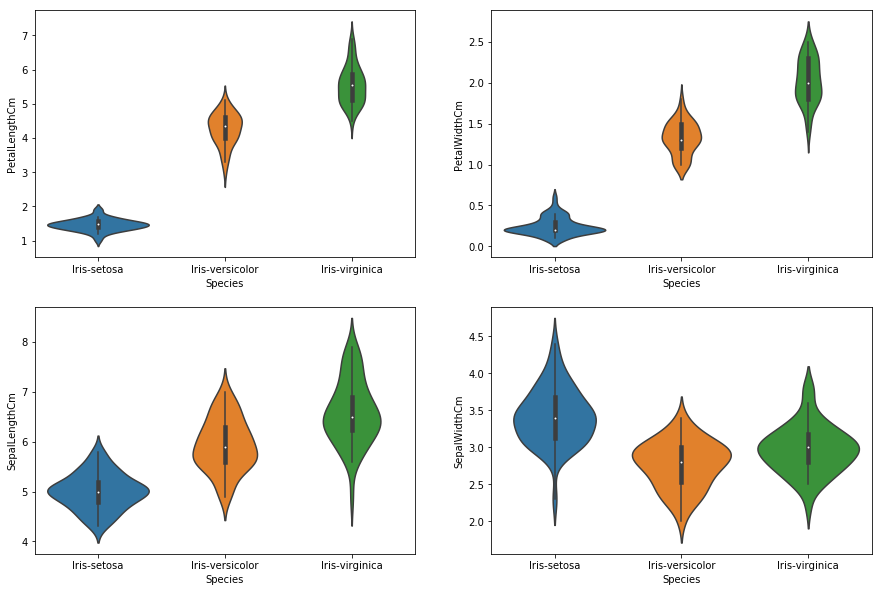

In [11]:
#The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

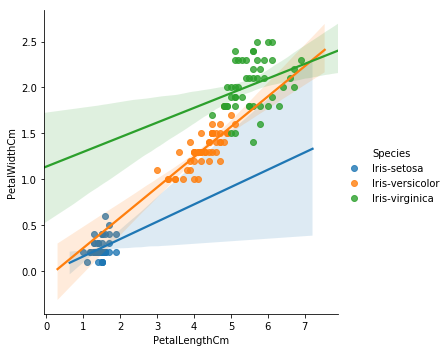

In [12]:
# Nicely separated in this lmplot

fig=sns.lmplot(x="PetalLengthCm", y="PetalWidthCm",hue='Species',data=df)

In [13]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
X = df.drop(['Species'],axis = 1) # knock out target
y = df['Species']     # Keep the target - 'Species'

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
# #It's better to scale your data so that models work better with scaled values

# from sklearn.preprocessing import StandardScaler


# sc = StandardScaler()  # Load the standard scaler
# x_train=sc.fit_transform(x_train)  
# x_test = sc.transform(x_test)  # Scale the feature data to be of mean 0 and variance 1


In [16]:
svm_model = svm.SVC()

In [17]:
svm_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
prediction = svm_model.predict(X_test)

In [19]:
print('Accuracy: ',metrics.accuracy_score(y_test,prediction))

Accuracy:  1.0


In [20]:
# Now just look at only the Petal features

X = df.drop(['Species','SepalLengthCm','SepalWidthCm'],axis = 1) # knock out target

In [21]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
svm_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [24]:
prediction = svm_model.predict(X_test)

In [25]:
print('Accuracy: ',metrics.accuracy_score(y_test,prediction))

Accuracy:  1.0


### Simply Perfect